In [10]:
import platform

print("### Pypy3 env")
os.system("pypy3 --version")

print("### Python3 env")
os.system("python3 --version")

print("### Ruby env")
os.system("ruby --version")

print("### Host OS")
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")
print(f"macOS: {platform.mac_ver()}")

### Pypy3 env
Python 3.7.13 (7e0ae751533460d5f89f3ac48ce366d8642d1db5, Apr 26 2022, 09:29:08)
[PyPy 7.3.9 with GCC Apple LLVM 13.1.6 (clang-1316.0.21.2)]
### Python3 env
Python 3.10.6
### Ruby env
ruby 3.1.2p20 (2022-04-12 revision 4491bb740a) [x86_64-darwin21]
### Host OS
System: Darwin
Release: 21.6.0
Version: Darwin Kernel Version 21.6.0: Sat Jun 18 17:07:25 PDT 2022; root:xnu-8020.140.41~1/RELEASE_X86_64
Machine: x86_64
Processor: i386
macOS: ('12.5', ('', '', ''), 'x86_64')


In [3]:
import os
import numpy as np
result = {
    'python3': [],
    'pypy': [],
    'ruby': [],
    'ruby_jit': [],
    'java':[]
}
# the location of the java library
java_library_location = '/Users/pfeil/git/ro-crate-java/'

times_to_run = 10
num_entities_crate = 50
num_crates = [10, 50, 100, 250, 500]
#num_crates = [500, 1000, 1500, 2500, 5000]
#num_crates = [1]

In [4]:
# java

def calc_result_java():
    java_file = open(java_library_location+'mul_mix_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['java'].append(np.mean(b))
    os.remove(java_library_location+'mul_mix_java.txt')


print('Starting java performance tests')    

data_path = '/Users/pfeil/git/ro-crate-benchmarks/data/'
base_id = "https://www.example.com/"
for times in num_crates:
    for i in range(times_to_run): 
        os.system("cd " + java_library_location + ";./gradlew performanceReadWriteMultipleCratesBenchmark --args=\""  + str(times) + ' ' + str(num_entities_crate) + ' ' + data_path +'\"')
    calc_result_java()

print(result)

Starting java performance tests

> Configure project :
Using release profile for building ro-crate-java

> Task :compileJava UP-TO-DATE
> Task :processResources UP-TO-DATE
> Task :classes UP-TO-DATE
> Task :compilePerformanceTestJava UP-TO-DATE
> Task :processPerformanceTestResources NO-SOURCE
> Task :performanceTestClasses UP-TO-DATE

> Task :performanceReadWriteMultipleCratesBenchmark
time taken: 0.974 seconds

BUILD SUCCESSFUL in 1s
4 actionable tasks: 1 executed, 3 up-to-date

> Configure project :
Using release profile for building ro-crate-java

> Task :compileJava UP-TO-DATE
> Task :processResources UP-TO-DATE
> Task :classes UP-TO-DATE
> Task :compilePerformanceTestJava UP-TO-DATE
> Task :processPerformanceTestResources NO-SOURCE
> Task :performanceTestClasses UP-TO-DATE

> Task :performanceReadWriteMultipleCratesBenchmark
time taken: 0.96 seconds

BUILD SUCCESSFUL in 1s
4 actionable tasks: 1 executed, 3 up-to-date

> Configure project :
Using release profile for building ro-cr

In [5]:
# python3
def calc_result_py():
    
    python_file = open('mul_mix_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['python3'].append(np.mean(b))
    os.remove("mul_mix_py.txt")

print('Starting python3 performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("python3 performance_tests/read_write/task.py " + str(times) + ' ' + str(num_entities_crate))
    calc_result_py()

print(result)
    

Starting python3 performance tests
10 0.3999640941619873
10 0.4562091827392578
10 0.4303548336029053
10 0.3056650161743164
10 0.3108510971069336
10 0.31090593338012695
10 0.30725812911987305
10 0.32219696044921875
10 0.3123331069946289
10 0.3192751407623291
50 1.5835299491882324
50 1.6623077392578125
50 2.0614349842071533
50 1.7006678581237793
50 1.5386030673980713
50 1.6005868911743164
50 1.5455539226531982
50 1.76596999168396
50 1.6367809772491455
50 1.6046688556671143
100 3.3479769229888916
100 3.1542439460754395
100 3.1528120040893555
100 3.28829288482666
100 3.556442975997925
100 3.330925941467285
100 3.2480618953704834
100 3.474112033843994
100 3.9753401279449463
100 3.1656079292297363
250 8.177322149276733
250 8.229517936706543
250 9.956430912017822
250 8.054625034332275
250 9.078946828842163
250 9.074516296386719
250 8.300212860107422
250 8.283092975616455
250 8.522416114807129
250 8.95006799697876
500 16.62286901473999
500 16.18368411064148
500 18.243178844451904
500 17.374456

In [6]:
# pypy3
def calc_result_pypy():
    
    python_file = open('mul_mix_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['pypy'].append(np.mean(b))
    os.remove("mul_mix_py.txt")

print('Starting python3 performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("pypy3 performance_tests/read_write/task.py " + str(times) + ' ' + str(num_entities_crate))
    calc_result_pypy()

print(result)

Starting python3 performance tests
10 0.7357580661773682
10 0.6875870227813721
10 0.6720569133758545
10 0.6992659568786621
10 0.7450389862060547
10 0.6603291034698486
10 0.6807088851928711
10 0.6637659072875977
10 0.6689519882202148
10 0.6543309688568115
50 2.2402079105377197
50 2.2576630115509033
50 2.2199039459228516
50 2.2178308963775635
50 2.1872520446777344
50 2.3297629356384277
50 2.192373037338257
50 2.1817431449890137
50 2.221930980682373
50 2.185122013092041
100 3.64353084564209
100 3.9016239643096924
100 3.7751669883728027
100 4.080306053161621
100 3.8652191162109375
100 4.349272966384888
100 3.901041030883789
100 3.663280963897705
100 3.4354798793792725
100 3.5309298038482666
250 7.518198013305664
250 7.352746963500977
250 7.1811840534210205
250 7.019563913345337
250 7.5606091022491455
250 7.265778064727783
250 7.097996950149536
250 7.665590047836304
250 7.369714021682739
250 7.2998998165130615
500 13.194040060043335
500 13.289498090744019
500 13.477679014205933
500 13.09393

In [7]:
# ruby
def calc_result_rb():
    
    rb_file = open('mul_mix_rb.txt', 'r')
    rb_lines = rb_file.readlines()
    b = np.asarray(rb_lines, dtype=float)
    result['ruby'].append(np.mean(b))
    os.remove("mul_mix_rb.txt")

print('Starting ruby performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("ruby performance_tests/read_write/task.rb " + str(times) + ' ' + str(num_entities_crate))
    calc_result_rb()

print(result)

Starting ruby performance tests
crates = 10 entities in crate = 50 time = 3.2660649999997986
crates = 10 entities in crate = 50 time = 3.4077000000033877
crates = 10 entities in crate = 50 time = 3.3801340000027267
crates = 10 entities in crate = 50 time = 3.3660060000001977
crates = 10 entities in crate = 50 time = 3.30619200000001
crates = 10 entities in crate = 50 time = 3.287158000002819
crates = 10 entities in crate = 50 time = 3.3566500000015367
crates = 10 entities in crate = 50 time = 3.3072400000019115
crates = 10 entities in crate = 50 time = 3.3288740000025427
crates = 10 entities in crate = 50 time = 3.2869949999985693
crates = 50 entities in crate = 50 time = 16.530549000002793
crates = 50 entities in crate = 50 time = 16.611201000003348
crates = 50 entities in crate = 50 time = 16.547699999999168
crates = 50 entities in crate = 50 time = 16.561462999998184
crates = 50 entities in crate = 50 time = 16.5896750000029
crates = 50 entities in crate = 50 time = 16.5127909999973

In [8]:
# ruby --jit

def calc_result_rbjit():
    
    rb_file = open('mul_mix_rb.txt', 'r')
    rb_lines = rb_file.readlines()
    b = np.asarray(rb_lines, dtype=float)
    result['ruby_jit'].append(np.mean(b))
    os.remove("mul_mix_rb.txt")

print('Starting ruby --jit performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("ruby --jit performance_tests/read_write/task.rb " + str(times) + ' ' + str(num_entities_crate))
    calc_result_rbjit()

print(result)

Starting ruby --jit performance tests
crates = 10 entities in crate = 50 time = 2.6209949999974924
crates = 10 entities in crate = 50 time = 2.478259999999864
crates = 10 entities in crate = 50 time = 2.4696049999984098
crates = 10 entities in crate = 50 time = 2.4594039999974484
crates = 10 entities in crate = 50 time = 2.5764799999997194
crates = 10 entities in crate = 50 time = 2.5179900000002817
crates = 10 entities in crate = 50 time = 2.600142000002961
crates = 10 entities in crate = 50 time = 2.448395999999775
crates = 10 entities in crate = 50 time = 2.530681000000186
crates = 10 entities in crate = 50 time = 2.4505880000033358
crates = 50 entities in crate = 50 time = 12.762997000001633
crates = 50 entities in crate = 50 time = 12.712771000002249
crates = 50 entities in crate = 50 time = 12.23933500000203
crates = 50 entities in crate = 50 time = 12.463767999997799
crates = 50 entities in crate = 50 time = 12.389393999997992
crates = 50 entities in crate = 50 time = 12.6258830

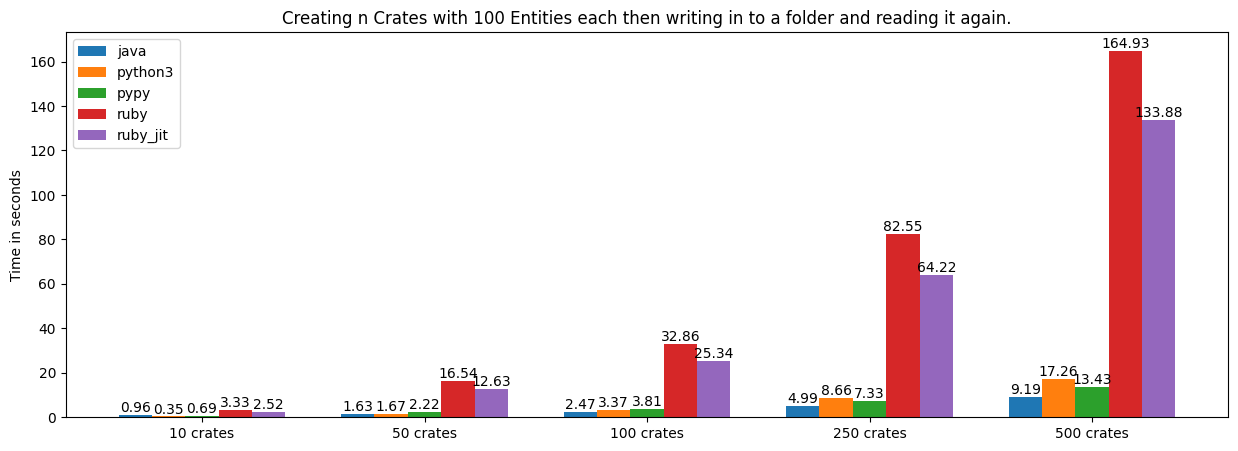

In [9]:
# plot

import matplotlib.pyplot as plt
import numpy as np



labels = ['java', 'python3', 'pypy', 'ruby', 'ruby_jit']
#labels = ['java', 'python3', 'pypy']


java_test = []
python3 = []
pypy = []
ruby = []
rubyjit = []

arrays = [[], [], [], [], []]

lan_times = len(labels)


x = np.arange(5)
ticks = np.arange(5)

width = 0.15

# plot
fig, ax = plt.subplots(1,1)
names = []
for i in num_crates:
    names.append(str(i) + ' crates')

ax.set_ylabel("Time in seconds")
ax.set_xticks(ticks)
ax.set_xticklabels(names)

fig.set_figwidth(15)
fig.set_figheight(5)



for i in range(lan_times):
    arrays[i] = np.around(result[labels[i]],2)

base_width = ticks - 2*width
for i in range(lan_times):
    br = ax.bar(base_width, arrays[i], width, label=labels[i])
    ax.bar_label(br)
    base_width += width


ax.set_title('Creating n Crates with 100 Entities each then writing in to a folder and reading it again.')
ax.legend()


plt.show()